# Ensemble learning

## 1) Preparing data with augmented images

In [2]:
import kagglehub
import tensorflow as tf
import numpy as np
import os
import shutil
import random
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# glowny zbior
path = kagglehub.dataset_download("mengcius/cinic10")
train_dir = path + "/train"
valid_dir = path + "/valid" # 8:2
test_dir = path + "/test"

## 1.1) Loading the prepared architectures

In [ ]:
from tensorflow.keras.models import load_model

stretch_armata = load_model('armata_cat_and_dog20.keras')
vgg = load_model('best_model_loss.h5')

flip = load_model('flip_32.h5')
sepia = load_model('armata_model_with_sepia1.h5')
resnet = load_model('resnet.h5')

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def load_images_from_directory(directory, target_size=(32, 32)):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Pobiera nazwy klas
    class_indices = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):
            continue
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            image = load_img(img_path, target_size=target_size)
            image = img_to_array(image) / 255.0  # Normalizacja
            images.append(image)
            labels.append(class_indices[class_name])

    return np.array(images), np.array(labels)

# Załaduj zbiór testowy
X_test, y_test = load_images_from_directory(test_dir)
X_valid, y_valid = load_images_from_directory(valid_dir)

In [ ]:
class_names = sorted(os.listdir(test_dir))
class_names

## 2) Ensemble models creation

### 2.1) Ensemble model with average voting creation

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.3, Vgg_with_stretch_weight: 0.7, Accuracy: 77.5333%
Test Loss: 0.6516


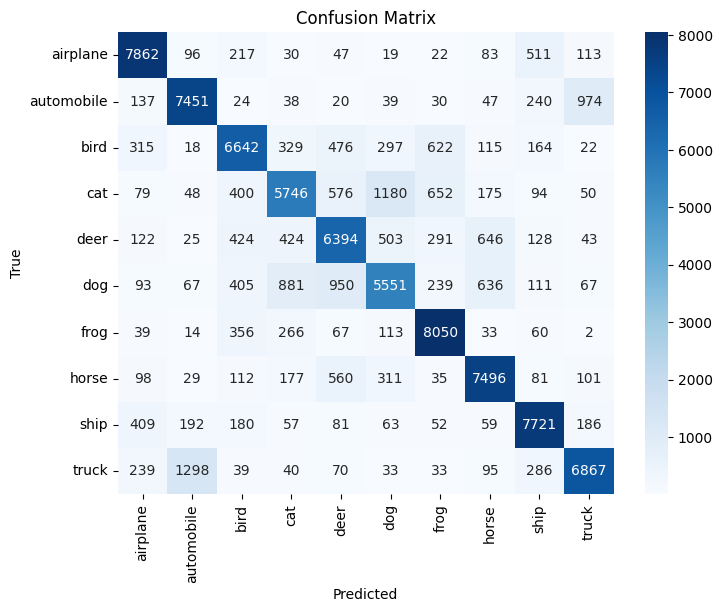

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.35, Vgg_with_stretch_weight: 0.65, Accuracy: 77.5356%
Test Loss: 0.6527


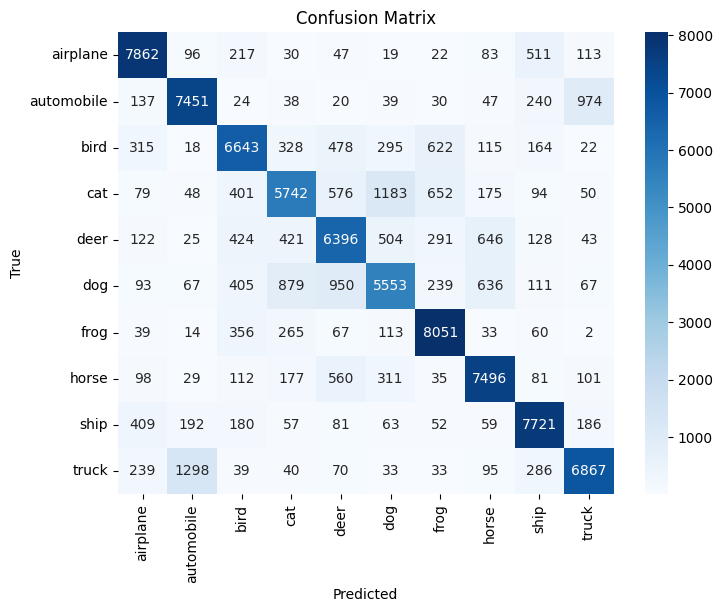

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.4, Vgg_with_stretch_weight: 0.6, Accuracy: 77.5400%
Test Loss: 0.6540


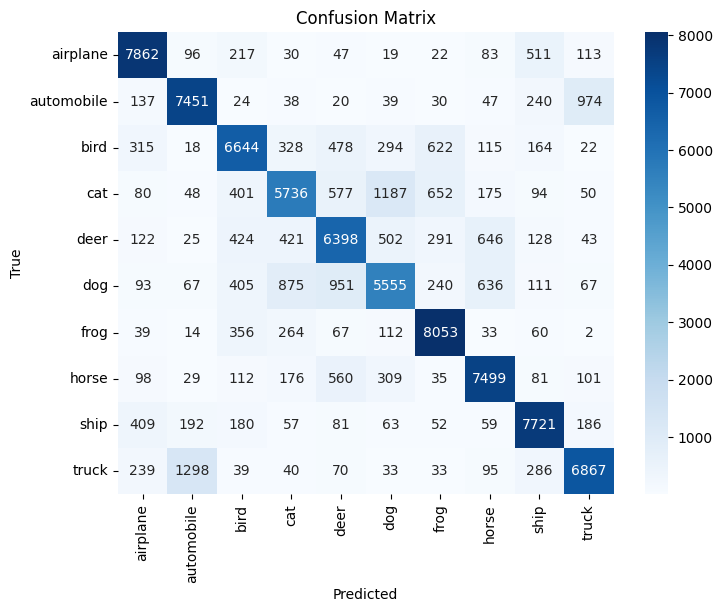

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.45, Vgg_with_stretch_weight: 0.55, Accuracy: 77.5433%
Test Loss: 0.6555


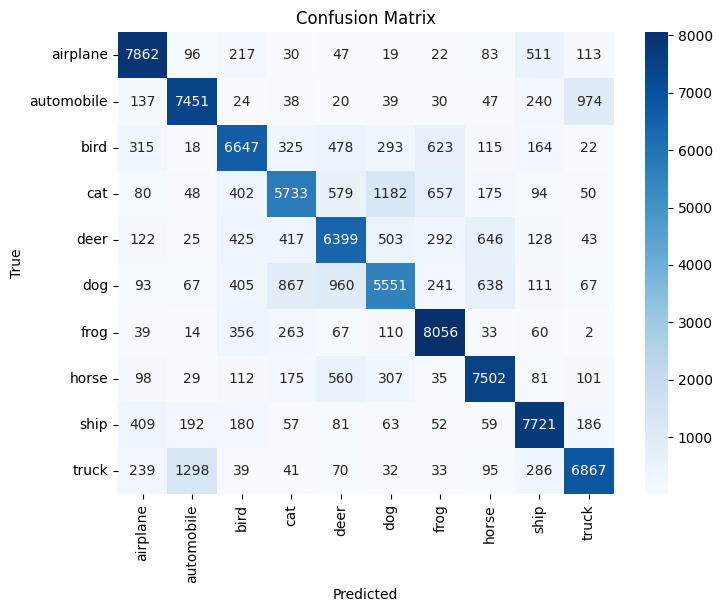

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.5, Vgg_with_stretch_weight: 0.5, Accuracy: 77.5500%
Test Loss: 0.6574


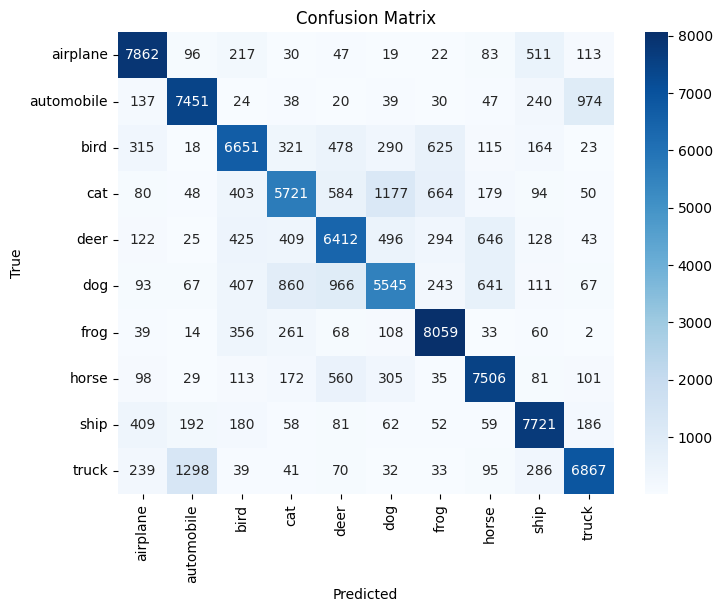

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.55, Vgg_with_stretch_weight: 0.44999999999999996, Accuracy: 77.5356%
Test Loss: 0.6596


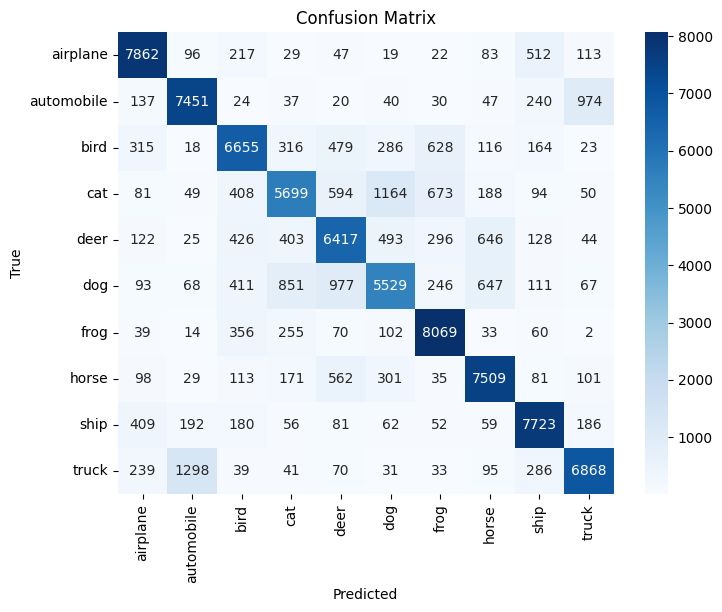

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.6, Vgg_with_stretch_weight: 0.4, Accuracy: 77.4922%
Test Loss: 0.6623


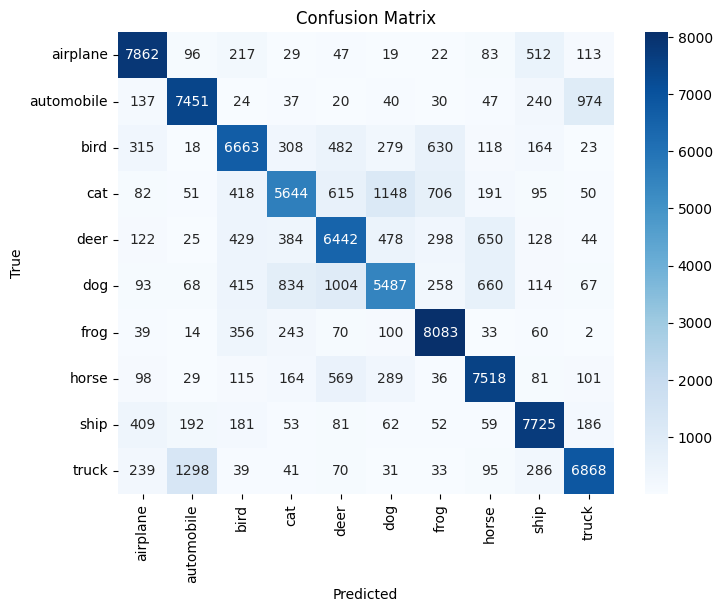

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.65, Vgg_with_stretch_weight: 0.35, Accuracy: 77.4111%
Test Loss: 0.6656


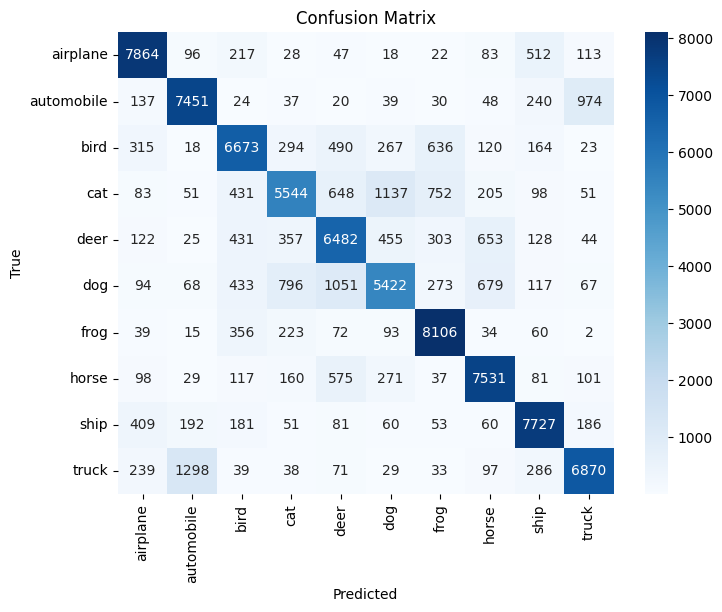

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.7, Vgg_with_stretch_weight: 0.30000000000000004, Accuracy: 77.2511%
Test Loss: 0.6696


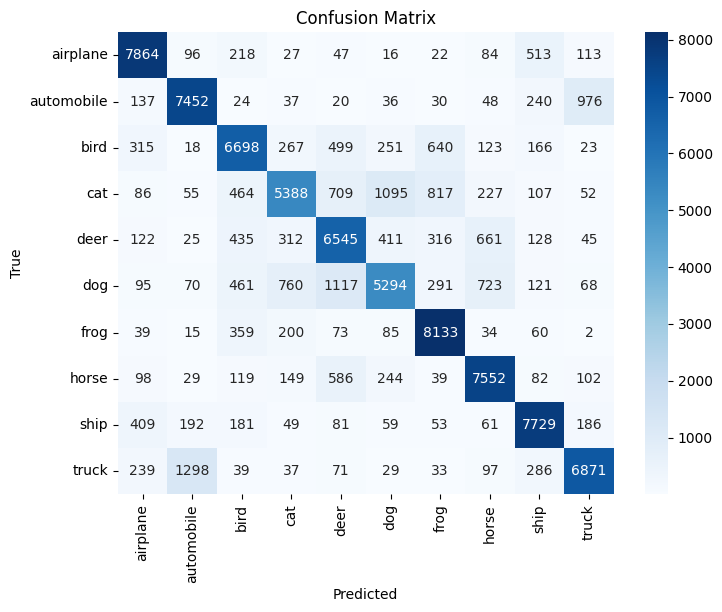

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

models_16class = [flip, sepia, resnet]
models_catdog = [stretch_armata, vgg]

def ensemble_predict(models_16class, models_catdog, X_test, weight_1, weight_2):
    # Get predictions from 16-class models
    prob_16class = [model.predict(X_test) for model in models_16class]

    # Average probabilities for 16 classes (Soft Voting)
    avg_prob_16class = np.mean(prob_16class, axis=0)  # (N, 16)

    weight_model1 = weight_1
    weight_model2 = weight_2
    # Get predictions from cat/dog models (only for cat/dog classes, assume class 0=cat, 1=dog)
    prob_catdog1 = models_catdog[0].predict(X_test)
    prob_catdog2 = models_catdog[1].predict(X_test)

    # Weighted average of cat/dog models
    prob_catdog_combined = weight_1 * prob_catdog1[:, [0, 1]] + weight_2 * prob_catdog2[:, [0, 1]]

    # Copy base probabilities
    final_probabilities = avg_prob_16class.copy()

    # Correctly update probabilities for cat (3) and dog (5)
    for i in range(len(X_test)):
        predicted_class = np.argmax(avg_prob_16class[i])

        if predicted_class in [3, 5]:  # If it's cat (3) or dog (5)
        # Use cat-dog model predictions
          final_probabilities[i, 3] = prob_catdog_combined[i, 0]  # Cat probability
          final_probabilities[i, 5] = prob_catdog_combined[i, 1]  # Dog probability

        final_probabilities[i] /= np.sum(final_probabilities[i])

    return final_probabilities  # Returns a proper probability distribution


# Example usage
for weight1 in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]:
    weight2 = 1 - weight1
    y_pred = ensemble_predict(models_16class, models_catdog, X_valid, weight1, weight2)

    loss_fn = SparseCategoricalCrossentropy(from_logits=False)
    loss = loss_fn(y_valid, y_pred).numpy()

    accuracy = np.mean(np.argmax(y_pred, axis=1) == y_valid)  # Convert probabilities to class predictions
    print(f"Weights of models for cats and dogs \n Armata_with_stretch_weight: {weight1}, Vgg_with_stretch_weight: {weight2}, Accuracy: {accuracy:.4%}")
    print(f"Test Loss: {loss:.4f}")
    cm = confusion_matrix(y_valid, np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()



In [ ]:
valid_loss = [0.6516, 0.6527,  0.6540, 0.6555, 0.6574, 0.6596, 0.6623, 0.6656, 0.6696]
valid_acc = [77.5333, 77.5356 ,77.5400, 77.5433, 77.5500, 77.5356, 77.4922, 77.4111, 77.2511]
valid_acc = [(x / 100) for x in valid_acc]
weights_model1 = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
weights_model2 = [1 - w for w in weights_model1]

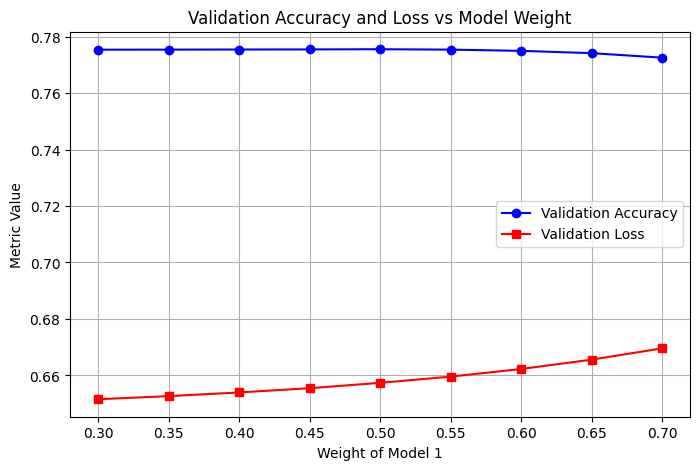

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(weights, valid_acc, marker='o', linestyle='-', label="Validation Accuracy", color='b')
plt.plot(weights, valid_loss, marker='s', linestyle='-', label="Validation Loss", color='r')

# Labels and Title
plt.xlabel("Weight of Model 1")
plt.ylabel("Metric Value")
plt.title("Validation Accuracy and Loss vs Model Weight")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

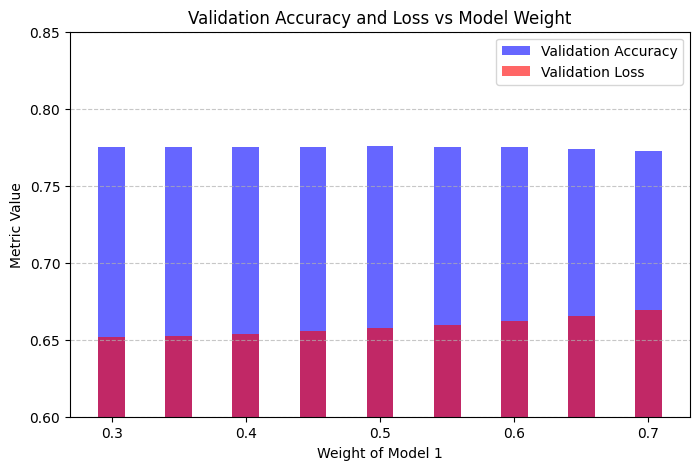

In [ ]:
# Bar width
bar_width = 0.02
x = np.array(weights)  # Convert to numpy array for shifting bars

# Plot
plt.figure(figsize=(8, 5))

# Accuracy Bar (on top)
plt.bar(x, valid_acc, width=bar_width, label="Validation Accuracy", color='b', alpha=0.6)

# Loss Bar (underneath)
plt.bar(x, valid_loss, width=bar_width, label="Validation Loss", color='r', alpha=0.6)

plt.ylim(0.6, 0.85)

# Labels and Title
plt.xlabel("Weight of Model 1")
plt.ylabel("Metric Value")
plt.title("Validation Accuracy and Loss vs Model Weight")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()

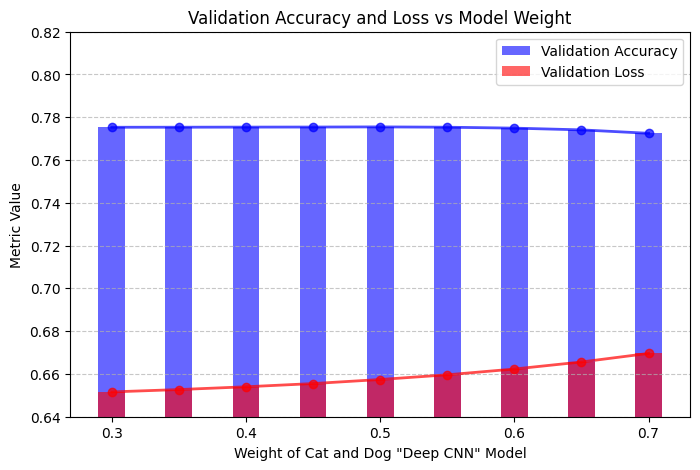

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
valid_loss = [0.6516, 0.6527, 0.6540, 0.6555, 0.6574, 0.6596, 0.6623, 0.6656, 0.6696]
valid_acc = [77.5333, 77.5356, 77.5400, 77.5433, 77.5500, 77.5356, 77.4922, 77.4111, 77.2511]
valid_acc = [x / 100 for x in valid_acc]  # Convert accuracy to fraction
weights = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

# Bar width
bar_width = 0.02
x = np.array(weights)  # Convert to numpy array for shifting bars

# Plot
plt.figure(figsize=(8, 5))

# Line Plot for Accuracy
plt.plot(x, valid_acc, color='b', marker='o', linestyle='-', linewidth=2, alpha = 0.7)

# Line Plot for Loss
plt.plot(x, valid_loss, color='r', marker='o', linestyle='-', linewidth=2, alpha = 0.7)

# Accuracy Bar (on top)
plt.bar(x, valid_acc, width=bar_width, label="Validation Accuracy", color='b', alpha=0.6)

# Loss Bar (underneath)
plt.bar(x, valid_loss, width=bar_width, label="Validation Loss", color='r', alpha=0.6)



# Set y-axis limits
plt.ylim(0.64, 0.82)

# Labels and Title
plt.xlabel('Weight of Cat and Dog "Deep CNN" Model')
plt.ylabel("Metric Value")
plt.title("Validation Accuracy and Loss vs Model Weight")
# Only include bars in the legend
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.3, Vgg_with_stretch_weight: 0.7, Accuracy: 76.7156%
Test Loss: 0.6696


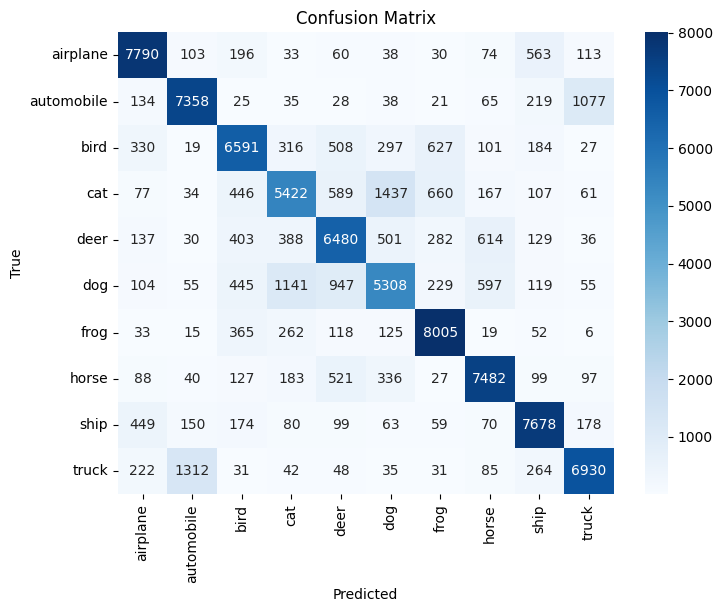

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

models_16class = [flip, sepia, resnet]
models_catdog = [stretch_armata, vgg]

def ensemble_predict(models_16class, models_catdog, X_test, weight_1, weight_2):
    # Get predictions from 16-class models
    prob_16class = [model.predict(X_test) for model in models_16class]

    # Average probabilities for 16 classes (Soft Voting)
    avg_prob_16class = np.mean(prob_16class, axis=0)  # (N, 16)

    weight_model1 = weight_1
    weight_model2 = weight_2
    # Get predictions from cat/dog models (only for cat/dog classes, assume class 0=cat, 1=dog)
    prob_catdog1 = models_catdog[0].predict(X_test)
    prob_catdog2 = models_catdog[1].predict(X_test)

    # Weighted average of cat/dog models
    prob_catdog_combined = weight_1 * prob_catdog1[:, [0, 1]] + weight_2 * prob_catdog2[:, [0, 1]]

    # Copy base probabilities
    final_probabilities = avg_prob_16class.copy()

    # Correctly update probabilities for cat (3) and dog (5)
    for i in range(len(X_test)):
        predicted_class = np.argmax(avg_prob_16class[i])

        if predicted_class in [3, 5]:  # If it's cat (3) or dog (5)
        # Use cat-dog model predictions
          final_probabilities[i, 3] = prob_catdog_combined[i, 0]  # Cat probability
          final_probabilities[i, 5] = prob_catdog_combined[i, 1]  # Dog probability

        final_probabilities[i] /= np.sum(final_probabilities[i])

    return final_probabilities  # Returns a proper probability distribution


# Example usage
for weight1 in [0.3]:
    weight2 = 1 - weight1
    y_pred = ensemble_predict(models_16class, models_catdog, X_test, weight1, weight2)

    loss_fn = SparseCategoricalCrossentropy(from_logits=False)
    loss = loss_fn(y_test, y_pred).numpy()

    accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)  # Convert probabilities to class predictions
    print(f"Weights of models for cats and dogs \n Armata_with_stretch_weight: {weight1}, Vgg_with_stretch_weight: {weight2}, Accuracy: {accuracy:.4%}")
    print(f"Test Loss: {loss:.4f}")
    cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()



Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.3, Vgg_with_stretch_weight: 0.7, Accuracy: 76.7156%
Test Loss: 0.6696


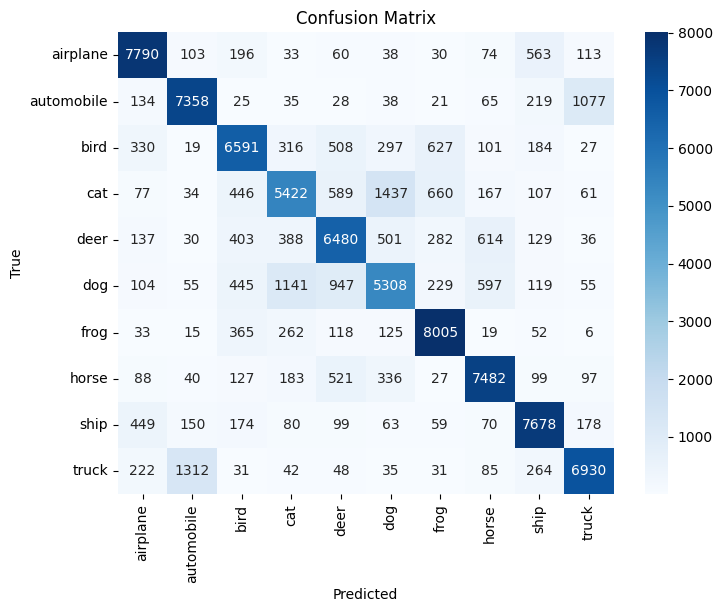

In [ ]:
loss_fn = SparseCategoricalCrossentropy(from_logits=False)
loss = loss_fn(y_test, y_pred).numpy()

accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)  # Convert probabilities to class predictions
print(f"Weights of models for cats and dogs \n Armata_with_stretch_weight: {weight1}, Vgg_with_stretch_weight: {weight2}, Accuracy: {accuracy:.4%}")
print(f"Test Loss: {loss:.4f}")
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Armata_with_stretch_weight: 0.3, Vgg_with_stretch_weight: 0.7, Accuracy: 77.5333%
Test Loss: 0.6516

### 2.2) Ensemble model with majority voting creation


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 76s 27ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 76s 27ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4032s 1s/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 241s 85ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.3, Vgg_with_stretch_weight: 0.7, Accuracy: 76.3489%
Test Loss: 3.5064


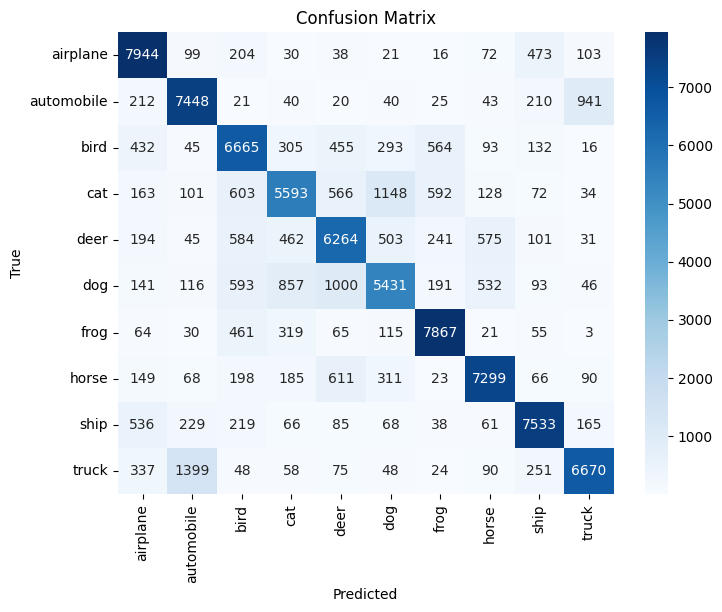

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4033s 1s/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 244s 87ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.35, Vgg_with_stretch_weight: 0.65, Accuracy: 76.3478%
Test Loss: 3.5070


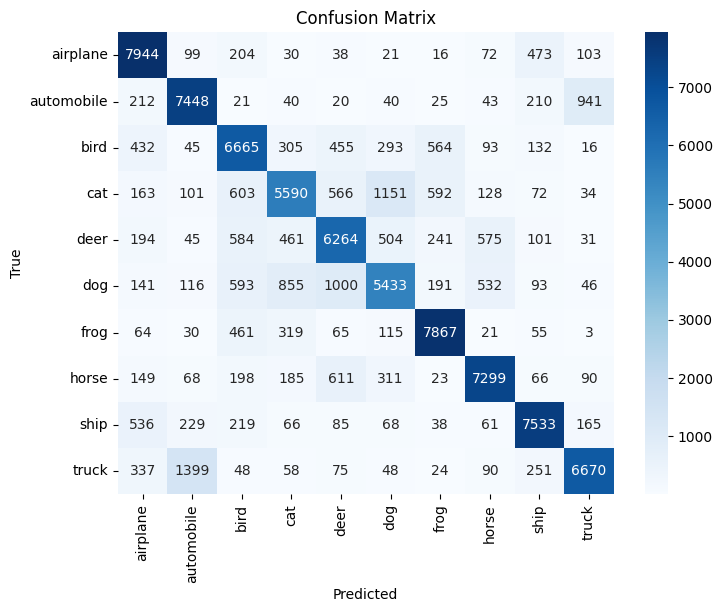

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4037s 1s/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 244s 87ms/step
Weights of models for cats and dogs 
 Armata_with_stretch_weight: 0.4, Vgg_with_stretch_weight: 0.6, Accuracy: 76.3444%
Test Loss: 3.5076


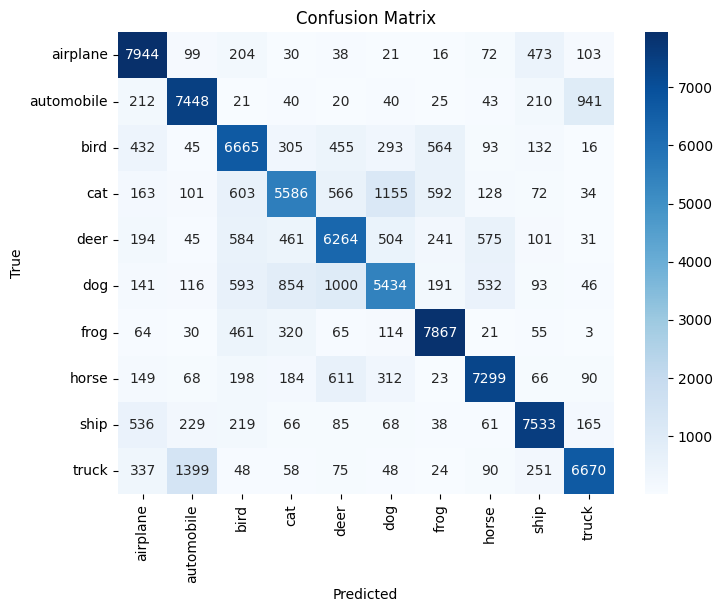

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step
 460/2813 ━━━━━━━━━━━━━━━━━━━━ 56:15 1s/step

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

models_16class = [flip, sepia, resnet]
models_catdog = [stretch_armata, vgg]

def ensemble_predict(models_16class, models_catdog, X_test, weight_1, weight_2):
    # Get predictions from 16-class models (majority voting)
    predictions_16class = [np.argmax(model.predict(X_test), axis=1) for model in models_16class]

    # Stack predictions from all 16 models (each of size N)
    predictions_16class = np.stack(predictions_16class, axis=1)  # (N, 16)

    # Majority voting: for each sample, take the most frequent prediction across the models
    majority_votes = np.array([np.bincount(predictions_16class[i]).argmax() for i in range(len(X_test))])

    # Get predictions from cat/dog models (only for cat/dog classes, assume class 0=cat, 1=dog)
    prob_catdog1 = models_catdog[0].predict(X_test)
    prob_catdog2 = models_catdog[1].predict(X_test)

    # Weighted average of cat/dog models (cat/dog class probabilities)
    prob_catdog_combined = weight_1 * prob_catdog1[:, [0, 1]] + weight_2 * prob_catdog2[:, [0, 1]]

    # Initialize final probabilities with 16-class predictions
    final_probabilities = np.zeros((len(X_test), 16))  # (N, 16)

    # Assign probabilities based on majority voting
    for i in range(len(X_test)):
        predicted_class = majority_votes[i]

        if predicted_class in [3, 5]:  # If it's cat (3) or dog (5)
            final_probabilities[i, 3] = prob_catdog_combined[i, 0]  # Cat probability
            final_probabilities[i, 5] = prob_catdog_combined[i, 1]  # Dog probability
        else:
            final_probabilities[i, predicted_class] = 1.0  # For other classes, set full probability to 1

    # Normalize the probabilities for each sample so that they sum to 1
    for i in range(len(X_test)):
        final_probabilities[i] /= np.sum(final_probabilities[i])

    return final_probabilities  # Return the final probability distribution for all classes

# Example usage
for weight1 in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]:
    weight2 = 1 - weight1
    y_pred = ensemble_predict(models_16class, models_catdog, X_valid, weight1, weight2)

    # Calculate loss
    loss_fn = SparseCategoricalCrossentropy(from_logits=False)
    loss = loss_fn(y_valid, y_pred).numpy()  # Loss calculation

    # Calculate accuracy
    accuracy = np.mean(np.argmax(y_pred, axis=1) == y_valid)  # Convert probabilities to class predictions and compare with true labels

    print(f"Weights of models for cats and dogs \n Armata_with_stretch_weight: {weight1}, Vgg_with_stretch_weight: {weight2}, Accuracy: {accuracy:.4%}")
    print(f"Test Loss: {loss:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_valid, np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


## 3) Presentation of final augmented dataset


In [ ]:
import cv2
import numpy as np

def stretch_image(image, stretch_factor=None, interpolation=cv2.INTER_LINEAR):
    h, w = image.shape[:2]

    # Ustalanie współczynnika rozciągania
    if stretch_factor is None:
        stretch_factor = np.random.uniform(0.8, 1.2)  # Bezpieczny zakres
    elif isinstance(stretch_factor, (list, tuple)):
        stretch_factor = np.random.uniform(stretch_factor[0], stretch_factor[1])

    # Rozciąganie szerokości i wysokości niezależnie
    new_w = int(w * stretch_factor)
    new_h = int(h * (1 / stretch_factor))  # Odwrócony współczynnik dla wysokości

    # Rozciąganie obrazu
    stretched = cv2.resize(image, (new_w, new_h), interpolation=interpolation)

    # Jeśli rozciągnięcie wykracza poza rozmiar, przycinamy
    if new_w > w:
        x_start = (new_w - w) // 2
        stretched = stretched[:, x_start:x_start + w]
    if new_h > h:
        y_start = (new_h - h) // 2
        stretched = stretched[y_start:y_start + h, :]

     # **Ensure final size is same as original**
    stretched = cv2.resize(stretched, (w, h), interpolation=interpolation)
    # Skalowanie powrotne do oryginalnych wymiarów
    return stretched


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img, array_to_img
import numpy as np

In [ ]:
def flip(img):
  img_array = img_to_array(img)  # Zamiana na tablicę NumPy

  # Wymuszenie odwrócenia (flip)
  flipped_img_array = np.fliplr(img_array)  # Odbicie lustrzane w poziomie

  # Konwersja z powrotem do obrazu
  flipped_img = flipped_img_array.astype(np.uint8)
  return flipped_img

array([[[ 0,  0,  0],
        [ 9,  9,  9],
        [ 1,  1,  1],
        ...,
        [ 5,  5,  5],
        [ 8,  8,  8],
        [ 0,  0,  0]],

       [[19, 19, 19],
        [22, 22, 22],
        [21, 21, 21],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [15, 15, 15]],

       [[17, 17, 17],
        [26, 26, 26],
        [40, 40, 40],
        ...,
        [ 3,  3,  3],
        [ 8,  8,  8],
        [10, 10, 10]],

       ...,

       [[14, 14, 14],
        [49, 49, 49],
        [24, 24, 24],
        ...,
        [20, 20, 20],
        [17, 17, 17],
        [11, 11, 11]],

       [[10, 10, 10],
        [41, 41, 41],
        [33, 33, 33],
        ...,
        [16, 16, 16],
        [ 7,  7,  7],
        [12, 12, 12]],

       [[ 0,  0,  0],
        [22, 22, 22],
        [ 1,  1,  1],
        ...,
        [22, 22, 22],
        [ 1,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)
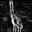

In [ ]:
apply_sobel(image)

In [ ]:
def apply_sobel(image):
    """ Wykrywanie krawędzi za pomocą filtra Sobela """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Normalizacja wartości do przedziału [0, 255]
    sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

    # Konwersja do RGB (powielenie kanału)
    sobel_combined = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2RGB)
    return sobel_combined

In [ ]:
# Obrót obrazu o dany kąt
def rotate_image(image, angle):
    """ Obraca obraz o dany kąt """
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h), borderMode=cv2.BORDER_REFLECT)
    return rotated_image

# Konwersja na sepię
def to_sepia(image):
    # Ensure image is BGR format
    if image.shape[-1] == 4:  # If the image has 4 channels (e.g., RGBA)
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

    # Convert BGR to float32 for transformation
    image = image.astype(np.float32) / 255  # Normalize

    # Apply Sepia filter
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                              [0.349, 0.686, 0.168],
                              [0.393, 0.769, 0.189]])  # Correct filter

    sepia_image = np.dot(image, sepia_filter.T)  # Matrix multiplication
    sepia_image = np.clip(sepia_image, 0, 1)  # Ensure values are in [0, 1]

    # Convert back to uint8
    sepia_image = (sepia_image * 255).astype(np.uint8)

    return sepia_image

# Konwersja na czarno-biały
def to_grayscale(image):
    """ Zmienia obraz na czarno-biały """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)  # Konwersja do formatu RGB
    return gray_rgb

# Crop obrazu
def crop_image(image):
    """ Przycinanie obrazu (crop) """
    h, w = image.shape[:2]
    crop_size = np.random.randint(24, 32)  # Losowy rozmiar
    x = np.random.randint(0, w - crop_size)
    y = np.random.randint(0, h - crop_size)
    cropped = image[y:y+crop_size, x:x+crop_size]
    return cv2.resize(cropped, (w, h))

# Stretch obrazu
def stretch_image2(image):
    """ Rozciąganie obrazu (stretch) """
    h, w = image.shape[:2]
    stretch_factor = np.random.uniform(1.0, 1.5)
    stretched = cv2.resize(image, (int(w * stretch_factor), h))
    return cv2.resize(stretched, (w, h))

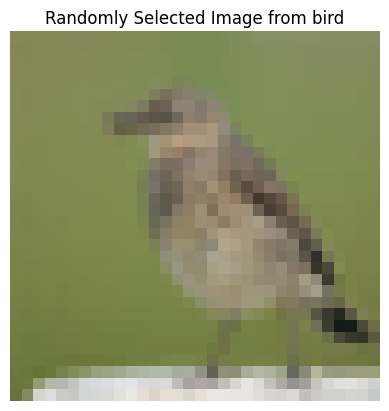

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define the path to the train directory
train_dir = path + "/train"

# Get a list of all class directories
class_dirs = [os.path.join(train_dir, 'bird') for class_name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, class_name))]

# Choose a random class
random_class_dir = random.choice(class_dirs)

# Get a list of images in the chosen class directory
image_files = [f for f in os.listdir(random_class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Choose a random image
random_image_path = os.path.join(random_class_dir, random.choice(image_files))

# Load the image using OpenCV
image = cv2.imread(random_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display in matplotlib

# Show the selected image
plt.imshow(image)
plt.axis("off")
plt.title(f"Randomly Selected Image from {os.path.basename(random_class_dir)}")
plt.show()


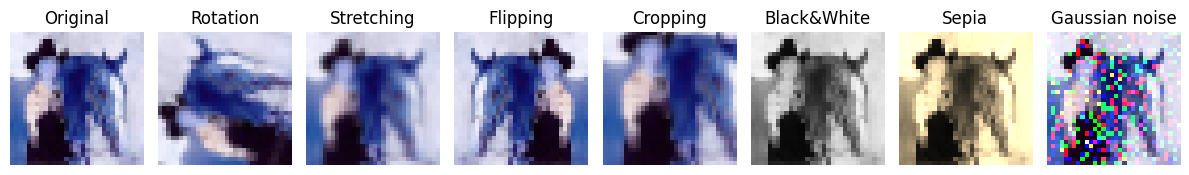

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def show_augmented_images(image):
    aug_images = [
        ("Original", image),
        ("Rotation", rotate_image(image, 70)),
        ("Stretching", stretch_image(image)),
        ('Flipping', flip(image)),
        ('Cropping', crop_image(image)),
        ('Black&White', to_grayscale(image)),
        ("Sepia", to_sepia(image)),
        ("Sobel", apply_sobel(image)),
        ("Gaussian noise", add_gaussian_noise(image))
    ]

    fig, axes = plt.subplots(1, len(aug_images), figsize=(12, 4))
    for ax, (title, img) in zip(axes, aug_images):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Load an example image (replace 'your_image.jpg' with actual image path)

show_augmented_images(image)


In [ ]:
# Gaussian Noise
def add_gaussian_noise(image):
    """ Dodaje subtelny szum Gaussa do obrazu """
    mean = 0
    stddev = 1  # intensywność szumu (zmiejszylem z 10 do 1)
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return np.clip(noisy_image, 0, 255)

In [ ]:
def show_augmented_images(image, display_size=(32, 32)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    aug_images = [
        #("Original", image),
        ("Rotation", rotate_image(image, 30)),
        ("Stretching", stretch_image(image)),
        ('Flipping', flip(image)),
        ('Cropping', crop_image(image)),
        ('Black&White', to_grayscale(image)),
        ("Sepia", to_sepia(image)),
        ("Gaussian noise", apply_sobel(image)),
        ("Sobel", apply_sobel(image))
    ]

    fig, axes = plt.subplots(2, 5, figsize=(9, 5))  # 2 rows, 4 columns
    fig.subplots_adjust(wspace=0.98, hspace=0.8)

        ## First column: Original image spanning two rows
    axes[0, 0].imshow(image)
    axes[0, 0].set_title("Original", fontsize=12)
    axes[0, 0].axis("off")
    axes[1, 0].imshow(image)
    axes[1, 0].axis("off")

    # Remaining images in positions
    positions = [(0, 1), (0, 2), (0, 3), (0,4), (1, 1), (1, 2), (1, 3), (1,4)]

    for (title, img), (row, col) in zip(aug_images, positions):
        img_resized = cv2.resize(img, display_size, interpolation=cv2.INTER_AREA)

    # Ensure correct color format
    if len(img_resized.shape) == 3:  # Only convert if it's a color image
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

        img_resized = cv2.resize(img, display_size, interpolation=cv2.INTER_AREA)
        axes[row, col].imshow(img_resized)
        axes[row, col].set_title(title, fontsize=10)
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()

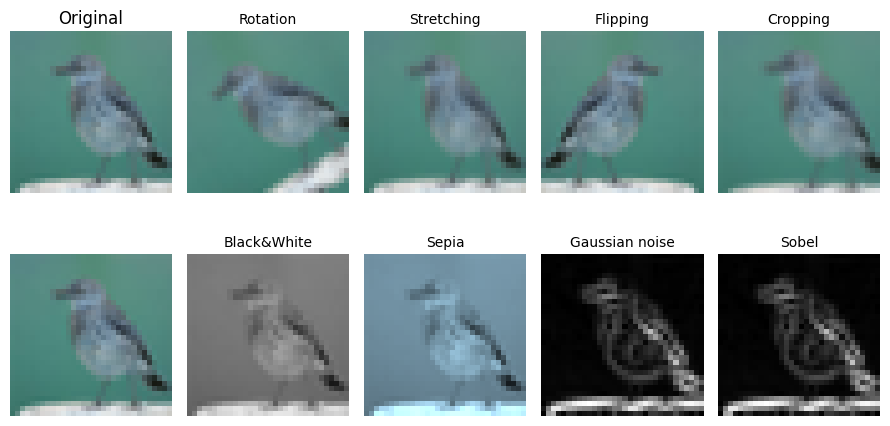

In [ ]:
show_augmented_images(image)